In [1]:
import torch                                  # Main PyTorch Library
import torchvision                            # Tools connected to applying ML to Vision problems
import torchvision.transforms as transforms   # Tools for transforming the shape or form of data
import torchvision.datasets as datasets       # Vision (Image) Datasets
import matplotlib.pyplot as plt               # Useful if we want to plot anything
import numpy as np                            # Numerical matrix/array calculation support
import torch.nn as nn                         # Specific pytorch functionality useful for neural networks
import torch.optim as optim                   # PyTorch optimizers (let it handle the gradient updates so you don't have to)
import random                                 # Just in case we need some random numbers

In [2]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())

# MNIST
- **Input**: $x \in \mathbb{R}^{28 \times 28}$
- **Output**: $y \in \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
- **Model**: $F(\vec{x})=\text{softmax}(A\vec{x} + b)$
  - $A: (10\times784) \cdot \vec{x}: (864 \times 1) + \vec{b}: (10 \times 1)$



In [3]:
trainset.data.shape # Shows image, pixel, pixel

torch.Size([60000, 28, 28])

In [4]:
trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

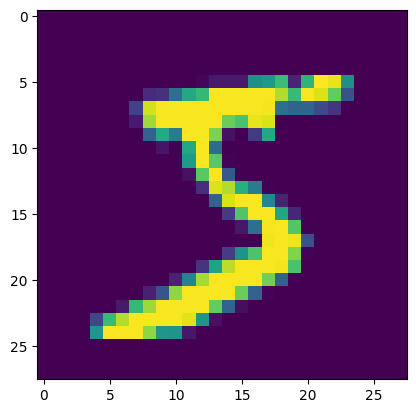

In [5]:
def imshow(img):
  img = img / 256 # Scale everything to be between 0 and 1
  plt.imshow( img ) # Generate the image
  plt.show() # Show the image

imshow( trainset.data[0] )

In [6]:
trainset.targets[0]

tensor(5)

In [7]:
x_train = (trainset.data / 256) - 0.5 # This rescales the images so that every pixel value is now between -0.5 and 0.5, which is generally just at a nicer scale than 0 to 256, numerically.
y_train = trainset.targets

# Scaling things to be close to 0 -> more numerically stable for calculations

In [8]:
x_train.shape

torch.Size([60000, 28, 28])

In [9]:
x_train = torch.nn.Flatten()( x_train ) # puts all pixels in one line

In [10]:
x_train.shape # 60000 vectors (pictures) of length 784 -> better for math we will do

torch.Size([60000, 784])

In [11]:
y_train.shape

torch.Size([60000])

# Model

Using softmax: $F(x)=\text{softmax}(Ax + b)$

In [12]:
A = torch.nn.Parameter( torch.randn(10, 784), requires_grad = True ) # tells PyTorch to keep track of all the information to calculate gradients
b = torch.nn.Parameter( torch.randn(10,1), requires_grad = True)

In [13]:
A

Parameter containing:
tensor([[-1.7810,  0.5015,  0.6334,  ..., -1.1527, -0.3246, -0.9180],
        [-0.7085, -1.1851,  0.1450,  ..., -0.1880,  1.8444,  0.2751],
        [-1.1511,  0.1793, -0.3236,  ..., -0.7637,  0.1113, -0.3546],
        ...,
        [-0.4152, -0.6384, -0.6692,  ..., -1.0911, -2.0136,  0.4380],
        [ 0.6467,  1.5456, -1.5975,  ...,  1.3514, -2.4219,  1.1258],
        [ 0.5953, -0.8522, -0.0906,  ...,  2.0625, -0.9246, -1.0234]],
       requires_grad=True)

Cannot just say Ax+b since dimensions don't match
* A: 10 rows x 784 cols
* x_train: 60000 rows x 784 cols
* But, x_train transpose: 784 rows x 60000 cols

Matrix multiplication will now work. Cannot use "*" since that is just the dot product. Need "matmul" or "@".

In [14]:
torch.matmul(A, x_train.t()).shape

torch.Size([10, 60000])

What we want in the end is 60000 x 10 -> for each of the 60000 data points, want 10 real values

Bias vector is 10 x 1

In [15]:
linear_mapping = torch.matmul(A, x_train.t()) + b

Example of broadcasting:

* A $\times$ x_train: 10 x 60000
* b: 10 x 1

In [16]:
linear_mapping.shape

torch.Size([10, 60000])

In [17]:
linear_mapping = linear_mapping.t()

In [18]:
linear_mapping.shape

torch.Size([60000, 10])

In [19]:
linear_mapping[0]

tensor([ -8.1428,   3.5295,  -9.8017,  -0.7199, -16.1750, -26.2776,  -2.3536,
         18.1751,  12.8549,  16.5923], grad_fn=<SelectBackward0>)

Logits: real value that we plug into softmax to get probabilities

In [20]:
logits = linear_mapping.t()

In [21]:
probabilities = torch.nn.Softmax( dim = 1 )( logits )

# logits is 60000x10 matrix
# probabilities = softmax(logits) would do softmax on every single value -> results in 60000x10 matrix, sum of all entries is 1
# we want each row to be a set of separate probability values so we do it only on dim=1 -> softmax across the rows

In [22]:
probabilities.shape

torch.Size([10, 60000])

In [23]:
probabilities[0]

tensor([2.1617e-12, 8.7327e-14, 5.7248e-18,  ..., 1.2201e-13, 4.4103e-13,
        3.2964e-18], grad_fn=<SelectBackward0>)

From above:

tensor([1.2508e-08, 9.6900e-11, 9.9968e-01, 1.1587e-15, 1.0502e-12, 9.1993e-08,
        7.3484e-13, 6.9942e-13, 3.0872e-04, 8.9547e-06],
       grad_fn=<SelectBackward0>)

9.9968e-01 shows that it is very confident that the number is a 3 (largest number), when we know it should be 5. There is no reason for it to perform well since it has not been optimized yet.

In [24]:
torch.sum( probabilities[ 0 ] )

tensor(1.0000, grad_fn=<SumBackward0>)

# Train

In [28]:
y_train.shape

torch.Size([60000])

In [29]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
probabilities_of_true_classes = probabilities[ y_train.numpy(), np.arange(0,60000) ]

In [32]:
probabilities_of_true_classes.shape

torch.Size([60000])

In [33]:
probabilities_of_true_classes[0]

tensor(8.8809e-20, grad_fn=<SelectBackward0>)

In [34]:
probabilities[0]

tensor([2.1617e-12, 8.7327e-14, 5.7248e-18,  ..., 1.2201e-13, 4.4103e-13,
        3.2964e-18], grad_fn=<SelectBackward0>)

In [59]:
# Main training loop

alpha = 0.7

for epochs in range(100): # 10 updates of gradient descent

  # Computing the result of the model
  linear_mapping = torch.matmul(A, x_train.t()) + b
  logits = linear_mapping.t()
  probabilities = torch.nn.Softmax( dim = 1 )( logits )

  # Calculating the Loss
  # We only care about the probability of the true class, not the others
  # - For each image, get probability associated with the true class
  # So, we cut out all the unnecessary stuff and only get labels from y_train
  probabilities_of_true_classes = probabilities[ np.arange(0,60000), y_train.numpy() ]

  # Manually calculating Cross Entropy Loss
  # - Mean of tensor of values
  loss = torch.mean( -1 * torch.log( probabilities_of_true_classes ) )

  print("Current Loss per Data Point:", loss.item())

  # Command for differentiation
  loss.backward()

  # Calculating and using the derivatives (Gradient Descent)
  with torch.no_grad(): # Don't bother remembering the calculation since we won't need it for derivatives later.
    A -= alpha * A.grad
    b -= alpha * b.grad

    # Delete gradient so they don't build up over time
    A.grad = None
    b.grad = None

Current Loss per Data Point: 0.7798113226890564
Current Loss per Data Point: 0.778701901435852
Current Loss per Data Point: 0.7775983214378357
Current Loss per Data Point: 0.776500940322876
Current Loss per Data Point: 0.7754091620445251
Current Loss per Data Point: 0.7743233442306519
Current Loss per Data Point: 0.7732434272766113
Current Loss per Data Point: 0.7721692323684692
Current Loss per Data Point: 0.771100640296936
Current Loss per Data Point: 0.7700377702713013
Current Loss per Data Point: 0.7689803838729858
Current Loss per Data Point: 0.7679286003112793
Current Loss per Data Point: 0.7668824195861816
Current Loss per Data Point: 0.765841543674469
Current Loss per Data Point: 0.7648060917854309
Current Loss per Data Point: 0.7637761235237122
Current Loss per Data Point: 0.7627512216567993
Current Loss per Data Point: 0.7617316246032715
Current Loss per Data Point: 0.7607174515724182
Current Loss per Data Point: 0.7597082257270813
Current Loss per Data Point: 0.7587042450904

Confusion Matrix:

For each image that is actually a 5, what does it get classified as most likely to be?

In [60]:
identification_counts = np.zeros( shape = (10,10), dtype = np.int32 ) # Matrix of all zeros to store the counts of correct vs incorrect classifications
linear_mapping = torch.matmul(A, x_train.t()) + b
logits = linear_mapping.t()

probabilities = torch.nn.Softmax( dim = 1 )( logits )
predicted_classes = torch.argmax( probabilities, dim = 1 ) # for probability matrix, get argmax across each row (position of largest predicted probability)

for i in range(60000):
  actual_class = y_train[i].item() # Actual label of the image
  predicted_class = predicted_classes[i].item()

  identification_counts[ actual_class, predicted_class ] += 1 # Tally that something of actual_class was most likely (by the model) to be predicted_class


print("Identification Count Matrix:\n", identification_counts)

Identification Count Matrix:
 [[5484    0   52   31   14  169   62   23   65   23]
 [   0 6286   80   63   11   55   10   23  206    8]
 [  79  124 4969  160  118   32  147  115  163   51]
 [  41   22  210 5078    5  351   47   85  191  101]
 [  21   20   48   23 5027   43   99   61  102  398]
 [ 146   80   87  268   92 4143  124   56  322  103]
 [  75   25  115   17   93  126 5360   11   79   17]
 [  25   50  116   53   92   32    9 5500   32  356]
 [  45  186  150  259   58  340   69   36 4574  134]
 [  39   43   34  127  403   87   12  343  113 4748]]


ex: first row [4299   39  196  119   60  492  343  220  139   16]

For images of 0, 4299 images were correctly classified as 0 and 39 were incorrectly classified to be a 1

A perfect model would be the identity matrix